In [38]:
import pandas as pd
import numpy as np
import plotly.express
from sklearn.manifold import TSNE
import yfinance as yf
from gtda.time_series import embedding, TakensEmbedding
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [57]:
stock = yf.download('AAPL', start='2022-01-01', end='2023-01-01')
electric_prod = pd.read_csv('./data/Electric_Production.csv')

[*********************100%%**********************]  1 of 1 completed


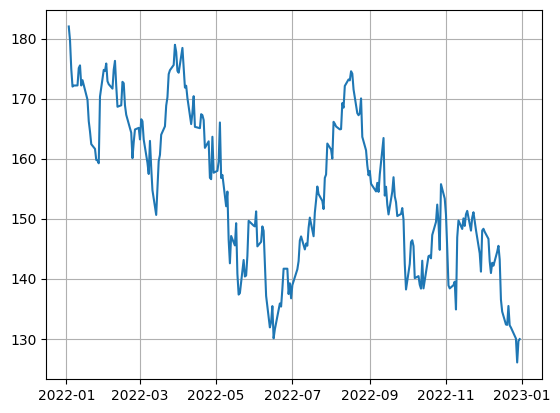

In [58]:
stock = stock.iloc[:1000]
stock = stock[['Close']]

electric_prod = electric_prod[['DATE', 'Value']]
electric_prod['DATE'] = pd.to_datetime(electric_prod['DATE'])
electric_prod = electric_prod.set_index('DATE')

plt.plot(stock)
plt.grid()

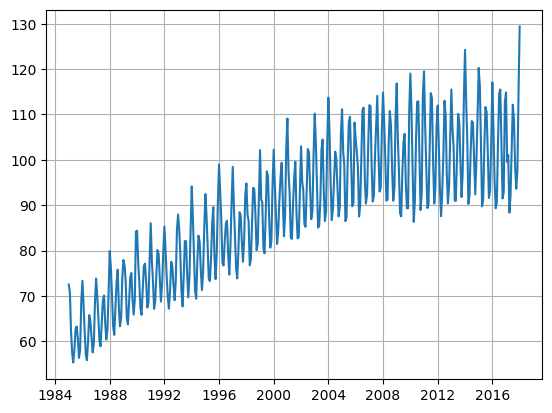

In [59]:
plt.plot(electric_prod)
plt.grid()

## Размерность вложения

In [66]:
stock['Close']

Date
2022-01-03    182.009995
2022-01-04    179.699997
2022-01-05    174.919998
2022-01-06    172.000000
2022-01-07    172.169998
                 ...    
2022-12-23    131.860001
2022-12-27    130.029999
2022-12-28    126.040001
2022-12-29    129.610001
2022-12-30    129.929993
Name: Close, Length: 251, dtype: float64

In [70]:
time_delay, embedding_dimension = embedding.takens_embedding_optimal_parameters(
    stock['Close'], 100, 10, stride=1
)

print(f"embedding: {embedding_dimension}\ndelay: {time_delay}")

embedding: 3
delay: 2


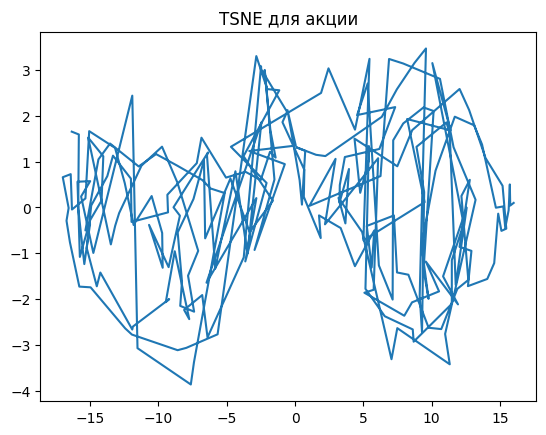

In [71]:
phase = TakensEmbedding(time_delay, embedding_dimension).fit_transform(stock['Close'].values.reshape(1, -1))[0]
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
results = tsne.fit_transform(phase)

plt.plot(results[:, 0], results[:, 1])
plt.title('TSNE для акций Apple')
plt.show()

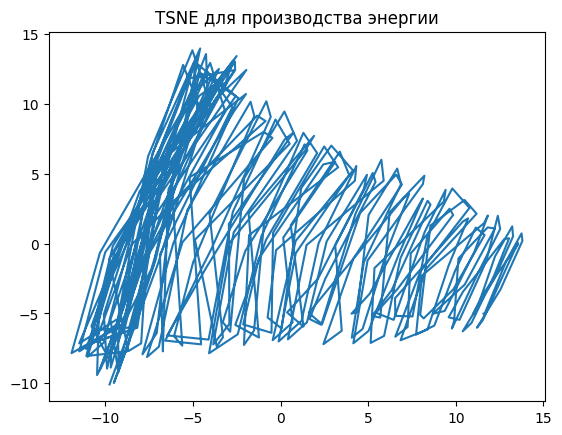

In [77]:
time_delay, embedding_dimension = embedding.takens_embedding_optimal_parameters(
    electric_prod['Value'], 100, 10, stride=1
)

phase = TakensEmbedding(time_delay, embedding_dimension).fit_transform(electric_prod['Value'].values.reshape(1, -1))[0]
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
results = tsne.fit_transform(phase)

plt.plot(results[:, 0], results[:, 1])
plt.title('TSNE для производства энергии')
plt.show()